In [1]:
import pandas as pd 
import os
import numpy as np

os.chdir(r'C:\Users\nicho\OneDrive\Desktop\Bitcoin Regresssion Project')
BTC = pd.read_csv(r'BTC-USD.csv' , parse_dates = ['Date'], index_col=['Date'])
SNP = pd.read_csv(r'Standard&PoorsHistorical.csv', parse_dates = ['Date'], index_col=['Date'])
Margin = pd.read_csv(r'margin-statistics.csv')
CPI = pd.read_csv(r'CPIHistoricalData.csv', parse_dates = ['Date'], index_col= ['Date'])
BTC.head(), Margin.head(), SNP.head(), CPI.head()

(            Symbol     Open     High      Low    Close  Volume BTC  \
 Date                                                                 
 2020-04-10  BTCUSD  7315.25  7315.25  7315.25  7315.25        0.00   
 2020-04-09  BTCUSD  7369.60  7378.85  7115.04  7315.25     2237.13   
 2020-04-08  BTCUSD  7201.81  7432.23  7152.80  7369.60     2483.60   
 2020-04-07  BTCUSD  7336.96  7468.42  7078.00  7201.81     2333.34   
 2020-04-06  BTCUSD  6775.21  7369.76  6771.01  7336.96     3727.47   
 
              Volume USD  
 Date                     
 2020-04-10         0.00  
 2020-04-09  16310014.53  
 2020-04-08  18138080.27  
 2020-04-07  17047120.32  
 2020-04-06  26533750.17  ,
   Year-Month Debit Balances in Customers' Securities Margin Accounts  \
 0    2021-11                                            918,598        
 1    2021-10                                            935,862        
 2    2021-09                                            903,117        
 3    2021-08      

In [2]:
#Dropping irrelevant features

Drop = ['Symbol', 'Open', 'High', 'Low', 'Volume BTC']
BTCDrop = BTC.drop(Drop, axis = 1)

Drop1 = ['Volume', 'Open', 'High', 'Low']
SNPDrop = SNP.drop(Drop1, axis = 1)


Drop3 = ['Open', 'High', 'Low', 'Volume']
CPIDrop = CPI.drop(Drop3, axis = 1)

In [3]:
#Renaming Columns
BTCDrop.rename(columns = {'Close': 'BTC', 
                          'Volume USD': 'Liquidity'}, inplace = True)

SNPDrop.rename(columns = {'Close/Last': 'SNP close'}, inplace = True)

CPIDrop.rename(columns = {'Close/Last': 'CPI close'}, inplace = True)

In [4]:
#Converting feature samples to monthly 
BTCMonthly = BTCDrop.resample('M').median()
CPIMonthly = CPIDrop.resample('M').median()
SNPMonthly = SNPDrop.resample('M').median()

#Setting index back to default
BTCMonthly.reset_index(inplace = True)
SNPMonthly.reset_index(inplace = True)
CPIMonthly.reset_index(inplace = True)

#Changing layout to use as key for merge
BTCMonthly['Date'] = BTCMonthly['Date'].dt.strftime('%Y-%m')
SNPMonthly['Date'] = SNPMonthly['Date'].dt.strftime('%Y-%m')
CPIMonthly['Date'] = CPIMonthly['Date'].dt.strftime('%Y-%m')



# Creating 2 Dataframes for testing to understand if larger data makes a difference in the predictability power

In [5]:
#Dataframe with Margin feature
MarginMerged = pd.concat([Margin, BTCMonthly, SNPMonthly, CPIMonthly], axis=1, join='inner')

MarginMerged.drop(['Free Credit Balances in Customers\' Cash Accounts', 'Date', 
             'Free Credit Balances in Customers\' Securities Margin Accounts'], axis = 1, inplace = True)

In [6]:
#Cleaning comma from feature
NewDebit = MarginMerged['Debit Balances in Customers\' Securities Margin Accounts']
NewDebit = [col.replace(',', '') for col in NewDebit]
MarginMerged['Debit Balances in Customers\' Securities Margin Accounts'] = NewDebit

In [7]:
#Dataframe without Margin feature
Merged = pd.concat([BTCDrop, SNPDrop, CPIDrop], axis=1, join='inner')
Merged.reset_index()

,Date,BTC,Liquidity,SNP close,CPI close
0,2020-04-09,7315.25,16310014.53,2789.82,0.1
1,2020-04-08,7369.60,18138080.27,2749.98,0.1
2,2020-04-07,7201.81,17047120.32,2659.41,0.1
3,2020-04-06,7336.96,26533750.17,2663.68,0.1
4,2020-04-03,6740.88,19692803.68,2488.65,0.1
...,...,...,...,...,...
1131,2015-10-14,253.00,30115.77,1994.24,-0.1
1132,2015-10-13,250.00,12875.40,2003.69,-0.1
1133,2015-10-12,247.60,9493.89,2017.46,-0.1
1134,2015-10-09,245.39,7651.63,2014.89,-0.1


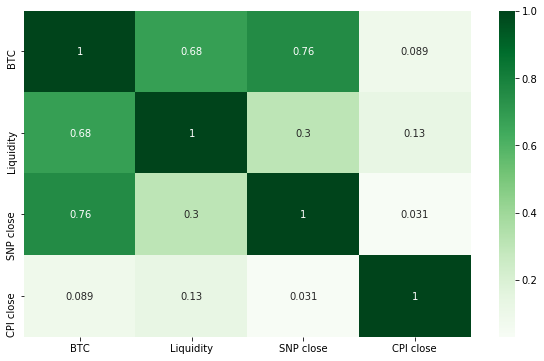

In [30]:
#Correlation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

correlations = MarginMerged.corr() 
plt.figure(figsize=(10,6))
sns.heatmap(correlations, cmap = 'Greens', annot = True)